Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.D37432_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 164s 252ms/step - accuracy: 0.7925 - loss: 0.4311 - val_accuracy: 0.9162 - val_loss: 0.2024
Epoch 2/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 132s 221ms/step - accuracy: 0.9125 - loss: 0.2177 - val_accuracy: 0.9235 - val_loss: 0.1828
Epoch 3/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 146s 249ms/step - accuracy: 0.9129 - loss: 0.2083 - val_accuracy: 0.9157 - val_loss: 0.1953
Epoch 4/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 187s 223ms/step - accuracy: 0.9230 - loss: 0.1902 - val_accuracy: 0.9291 - val_loss: 0.1734
Epoch 5/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 130s 222ms/step - accuracy: 0.9236 - loss: 0.1836 - val_accuracy: 0.9224 - val_loss: 0.1790
Epoch 6/10
582/582 ━━━━━━━━━━━━━━━━━━━━ 130s 221ms/step - accuracy: 0.9254 - loss: 0.1798 - val_accuracy: 0.9228 - val_loss: 0.1826
Epoch 7/10
582/582 ━━━━━

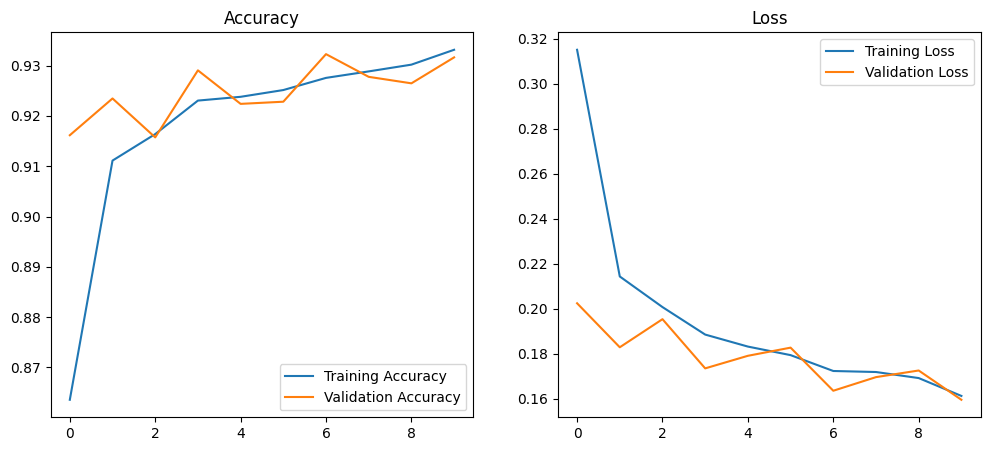

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 855ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 186ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

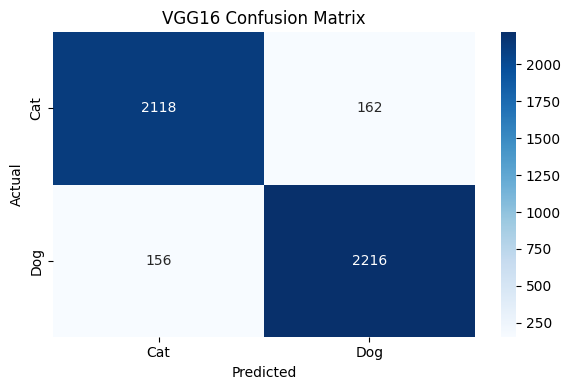

📋 VGG16 Classification Report:
              precision    recall  f1-score   support

         Cat       0.93      0.93      0.93      2280
         Dog       0.93      0.93      0.93      2372

    accuracy                           0.93      4652
   macro avg       0.93      0.93      0.93      4652
weighted avg       0.93      0.93      0.93      4652

✅ Accuracy: 0.9316423043852107
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 182ms/step


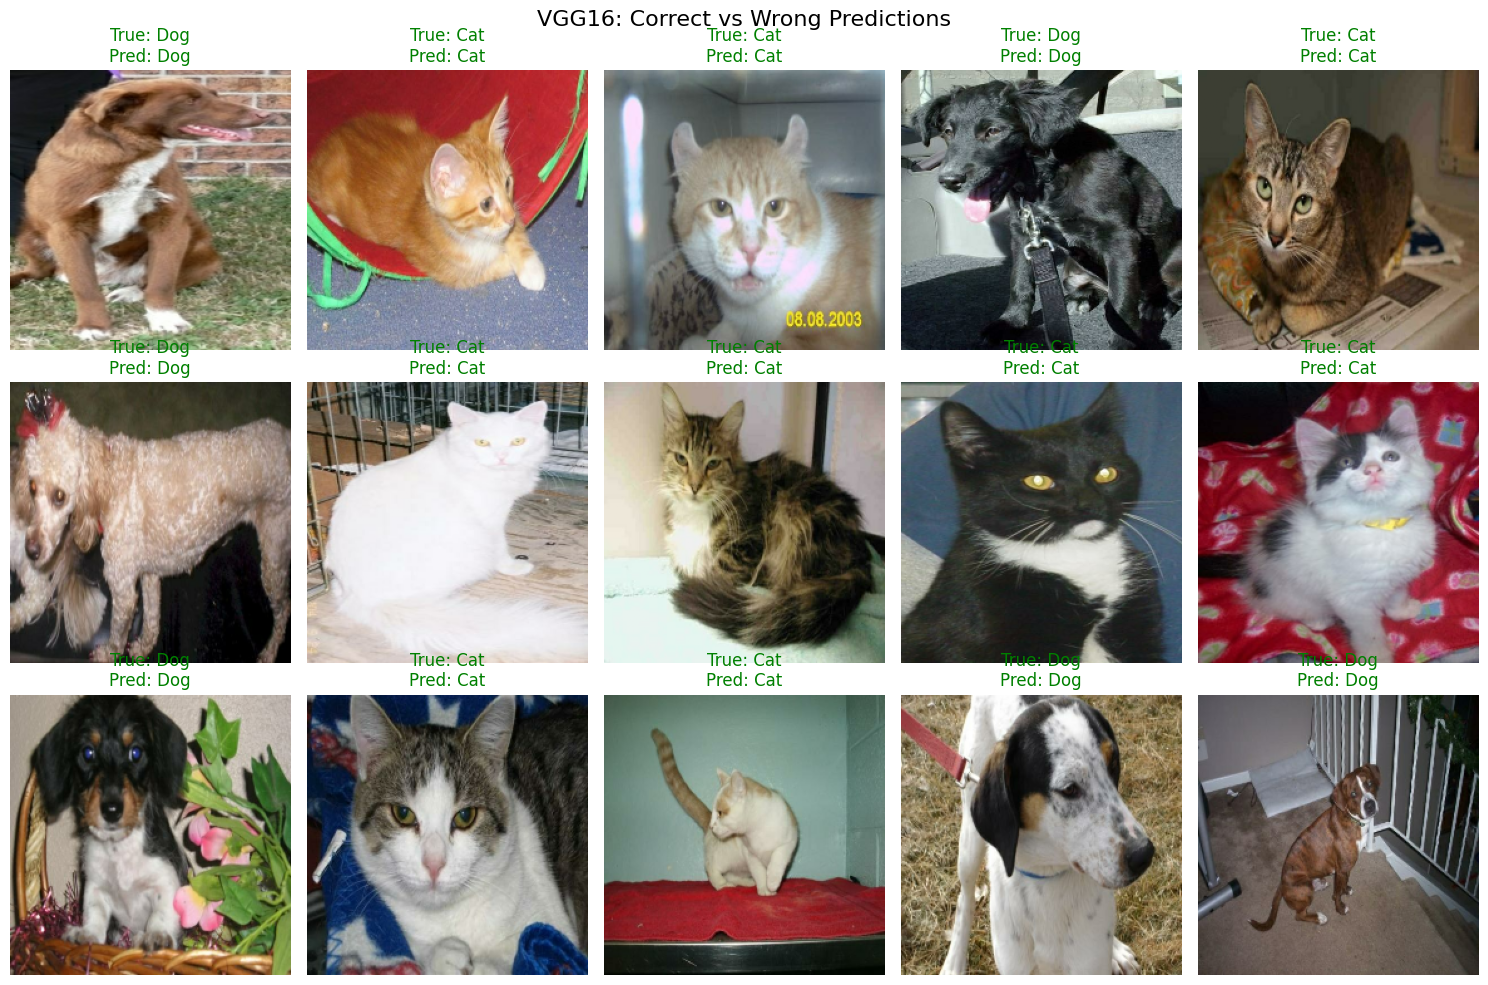

In [ ]:
# STEP 1: Install and import libraries
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import os

# STEP 2: Load the Cats vs Dogs dataset
(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

# STEP 3: Preprocessing & Augmentation functions
def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

def augment(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, 0.1)
    return image, label

# STEP 4: Prepare batched datasets
BATCH_SIZE = 32

train_batches = (train_ds
                 .map(preprocess)
                 .map(augment)
                 .shuffle(1000)
                 .batch(BATCH_SIZE)
                 .prefetch(tf.data.AUTOTUNE))

val_batches = (val_ds
               .map(preprocess)
               .batch(BATCH_SIZE)
               .prefetch(tf.data.AUTOTUNE))

# STEP 5: Load VGG16 base model and freeze it
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze convolutional layers

# STEP 6: Build the classifier model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')  # Binary output
])

# STEP 7: Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# STEP 8: Train the model
EPOCHS = 10

history = model.fit(
    train_batches,
    validation_data=val_batches,
    epochs=EPOCHS
)

# STEP 9: Plot accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# STEP 10: Save the trained model
model.save("cats_vs_dogs_vgg16_model.h5")

# STEP 11: Reload validation dataset for evaluation
import tensorflow_datasets as tfds

(train_ds, val_ds), ds_info = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:]'],
    shuffle_files=True,
    as_supervised=True,
    with_info=True
)

def preprocess(image, label):
    image = tf.image.resize(image, (224, 224))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

BATCH_SIZE = 32
val_batches = (val_ds
               .map(preprocess)
               .batch(BATCH_SIZE)
               .prefetch(tf.data.AUTOTUNE))
# STEP 12: Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

y_true = []
y_pred = []

for images, labels in val_batches:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend((preds > 0.5).astype("int32").flatten())

y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Plot Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Cat", "Dog"], yticklabels=["Cat", "Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("VGG16 Confusion Matrix")
plt.tight_layout()
plt.savefig("vgg16_confusion_matrix.png")
plt.show()

# Print Classification Report
print("📋 VGG16 Classification Report:")
print(classification_report(y_true, y_pred, target_names=["Cat", "Dog"]))
print("✅ Accuracy:", accuracy_score(y_true, y_pred))

import random

# Take a few validation batches for visualization
val_images = []
val_labels = []
for images, labels in val_batches.take(5):
    val_images.extend(images)
    val_labels.extend(labels)

val_images = tf.stack(val_images)
val_labels = tf.stack(val_labels)

# Predict
preds = model.predict(val_images)
pred_classes = (preds > 0.5).astype("int32").flatten()

# Plotting
plt.figure(figsize=(15, 10))
for i in range(15):
    idx = random.randint(0, len(val_images)-1)
    plt.subplot(3, 5, i+1)
    plt.imshow(val_images[idx].numpy())
    true = "Dog" if val_labels[idx].numpy() == 1 else "Cat"
    pred = "Dog" if pred_classes[idx] == 1 else "Cat"
    color = "green" if true == pred else "red"
    plt.title(f"True: {true}\nPred: {pred}", color=color)
    plt.axis('off')

plt.suptitle("VGG16: Correct vs Wrong Predictions", fontsize=16)
plt.tight_layout()
plt.savefig("vgg16_prediction_grid.png")  # Optional for report
plt.show()
